# Optical Flow CNN for test data

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys
import lmdb

%matplotlib inline
from PIL import Image

In [2]:
import caffe

/home/lnmiit/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/lnmiit/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/lnmiit/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


In [3]:
caffe.set_device(0)
caffe.set_mode_gpu()

## 1. Creating Test net

In [4]:
# net = caffe.Net('demoDeploy.prototxt', caffe.TEST)
import os
print(os.getcwd())

/home/lnmiit/caffe/examples/optical_flow


In [5]:
caffe_root = '../..' # assuming this notebook is in {caffe_root}/examples/optical_flow
if os.path.isfile(caffe_root + '/examples/optical_flow/opt_flow_quick_iter_2000.caffemodel'):
    print 'Caffe Model found.'
else:
    print 'Caffe Model Not Found.'
    

Caffe Model found.


## 2. Read from lmdb to find the max and min values

In [14]:
# http://research.beenfrog.com/code/2015/03/28/read-leveldb-lmdb-for-caffe-with-python.html
def get_data_for_id_from_lmdb(lmdb_name, id):
    lmdb_env = lmdb.open(lmdb_name, readonly=True)
    lmdb_txn = lmdb_env.begin()
    
    lmdb_cursor = lmdb_txn.cursor()
    raw_datum = lmdb_txn.get(id)
    datum = caffe.proto.caffe_pb2.Datum()
    datum.ParseFromString(raw_datum)
    
    if(len(datum.data)):
        feature = np.fromstring(datum.data, dtype=float).reshape(datum.channels, datum.height, datum.width)
    label = datum.label
    
    return(label, feature)

In [25]:
# http://research.beenfrog.com/code/2015/03/28/read-leveldb-lmdb-for-caffe-with-python.html
def get_min_from_lmdb(lmdb_name):
    lmdb_env = lmdb.open(lmdb_name, readonly=True)
    lmdb_txn = lmdb_env.begin()
    
    lmdb_cursor = lmdb_txn.cursor()
    #raw_datum = lmdb_txn.get(id)
    datum = caffe.proto.caffe_pb2.Datum()
    #datum.ParseFromString(raw_datum)
    i=0
    for key, val in lmdb_cursor:
        print(key)
        datum.ParseFromString(val)
        if(len(datum.data)):
            #feature = np.fromstring(datum.data, dtype=float).reshape(datum.channels, datum.height, datum.width)
            feature = np.fromstring(datum.data, dtype="uint8").reshape(datum.channels, datum.height, datum.width)
        label = datum.label
        print(datum.label)
        i=i+1
        # return the ith frame
        if i==808:
            return feature
        #break
        
#    if(len(datum.data)):
#        feature = np.fromstring(datum.data, dtype=float).reshape(datum.channels, datum.height, datum.width)
#    label = datum.label
    
#    return(label, feature)

In [26]:
f = get_min_from_lmdb("test_bgr_flow_lmdb")
f.shape

00000000
2
00000001
2
00000002
2
00000003
2
00000004
2
00000005
2
00000006
2
00000007
2
00000008
2
00000009
2
00000010
2
00000011
2
00000012
2
00000013
2
00000014
2
00000015
2
00000016
2
00000017
2
00000018
2
00000019
2
00000020
2
00000021
2
00000022
2
00000023
2
00000024
2
00000025
2
00000026
2
00000027
2
00000028
2
00000029
2
00000030
2
00000031
2
00000032
2
00000033
2
00000034
2
00000035
2
00000036
2
00000037
2
00000038
4
00000039
4
00000040
4
00000041
4
00000042
4
00000043
4
00000044
4
00000045
4
00000046
4
00000047
4
00000048
4
00000049
4
00000050
4
00000051
4
00000052
4
00000053
4
00000054
4
00000055
4
00000056
4
00000057
3
00000058
3
00000059
3
00000060
3
00000061
3
00000062
3
00000063
3
00000064
3
00000065
3
00000066
3
00000067
3
00000068
3
00000069
3
00000070
3
00000071
3
00000072
3
00000073
3
00000074
3
00000075
3
00000076
3
00000077
3
00000078
3
00000079
3
00000080
3
00000081
3
00000082
3
00000083
3
00000084
3
00000085
3
00000086
3
00000087
3
00000088
3
00000089
3
00000090
3

(3, 120, 160)

In [27]:
np.save("boxingvideo77", f)

In [45]:
print(f.sum())
print(f[0,...])
print(np.std(f))
print(np.mean(f))

-6083.53071298
[[  2.22780113e-03   2.35364749e-03   1.84334849e-03 ...,  -1.71208270e-02
   -1.10988934e-02  -6.62676385e-03]
 [  3.41126812e-03   4.36153170e-03   4.09808476e-03 ...,  -1.82767939e-02
   -1.18573140e-02  -6.92066969e-03]
 [  3.75317782e-03   4.81800409e-03   4.63473797e-03 ...,  -2.30562780e-02
   -1.50959976e-02  -8.23362079e-03]
 ..., 
 [  3.30771087e-04   8.44751194e-05   2.95622944e-04 ...,  -1.79869676e-04
    5.05336327e-04  -4.27378080e-04]
 [  2.67182651e-04   4.10669949e-04   8.77991086e-04 ...,  -8.78890743e-04
   -4.96696390e-04  -9.41016711e-04]
 [  6.48967616e-05   3.52940464e-04   9.03793960e-04 ...,  -1.52363253e-04
   -1.55840520e-04  -6.65307685e-04]]
0.33855395542
-0.158425278984


## 3. Draw the historgram of the data

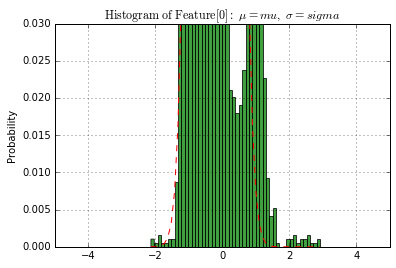

In [54]:
import matplotlib.mlab as mlab
n, bins, patches = plt.hist(f[1,...].flatten(), 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, np.mean(f[1,...]), np.std(f[1,...]))
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Feature[0]:}\ \mu=mu,\ \sigma=sigma$')
plt.axis([-5, 5, 0, 0.03])
plt.grid(True)

plt.show()

## 4. Visualize the flow

In [49]:
def draw_flow(img, flow, step=16):
    h, w = img.shape[:2]
    y, x = np.mgrid[step/2:h:step, step/2:w:step].reshape(2,-1)
    fx, fy = flow[y,x].T
    lines = np.vstack([x, y, x+fx, y+fy]).T.reshape(-1, 2, 2)
    lines = np.int32(lines + 0.5)
    vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cv2.polylines(vis, lines, 0, (0, 255, 0))
    for (x1, y1), (x2, y2) in lines:
        cv2.circle(vis, (x1, y1), 1, (0, 255, 0), -1)
    return vis


In [103]:
f = get_min_from_lmdb("train_opt_flow_lmdb")
f = np.rollaxis(np.rollaxis(f, 2), 2)
print(f.shape)
hsv = np.zeros((120,160,3), dtype='uint8')
print(hsv.shape)
hsv[...,1] = 255
mag, ang = cv2.cartToPolar(f[...,0], f[...,1])
hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
hsv[...,0] = (ang*180/np.pi/2)
hsv[...,0]

00000000
0
00000001
0
(120, 160, 2)
(120, 160, 3)


array([[  6,   8,  13, ...,  92,  93,  94],
       [  6,   7,   9, ...,  93,  93,  94],
       [  9,   9,  12, ...,  91,  92,  92],
       ..., 
       [142, 135, 136, ..., 133, 143, 124],
       [144, 140, 142, ..., 128, 128, 120],
       [138, 141, 144, ..., 131, 130, 118]], dtype=uint8)

In [104]:
# Farneback params
#flow = cv2.calcOpticalFlowFarneback(prev_gray,gray,0.5,1,3,15,3,5,1)

#np.max(hsv[...,0].astype(int))
#hsv = np.zeros((120,160,3), dtype='uint8')
bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
#hsv[...,0].dtype

In [120]:
#cv2.imshow("out", bgr)
np.save("myfile.txt", bgr)

In [124]:
temp = np.load("myfile.txt.npy")

In [127]:
temp.dtype
# The flow was visualized with
#bgr = np.load("myfile.txt.npy")
#cv2.imshow("demo", bgr)
#

dtype('uint8')

## 5. Convert the OF LMDB to BGR LMDB

In [128]:
# receive a (2, 120, 160) OF matrix and return the (3, 120, 160) BGR matrix
def OF_matrix_to_bgr(f):
    f = np.rollaxis(np.rollaxis(f, 2), 2)
    #print(f.shape)
    hsv = np.zeros((120,160,3), dtype='uint8')
    #print(hsv.shape)
    hsv[...,1] = 255
    mag, ang = cv2.cartToPolar(f[...,0], f[...,1])
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    hsv[...,0] = (ang*180/np.pi/2)
    # getting a (120, 160, 3) dimension bgr matrix
    bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
    # rollaxis to get (3, 120, 160) dimension bgr matrix
    bgr = np.rollaxis(bgr, 2)
    return bgr

In [136]:
def convert_to_bgr_lmdb(lmdb_name):
    lmdb_env = lmdb.open(lmdb_name, readonly=True)
    lmdb_txn = lmdb_env.begin()
    
    lmdb_cursor = lmdb_txn.cursor()
    #raw_datum = lmdb_txn.get(id)
    datum = caffe.proto.caffe_pb2.Datum()
    #datum.ParseFromString(raw_datum)
    i=0
    for key, val in lmdb_cursor:
        print(key)
        datum.ParseFromString(val)
        if(len(datum.data)):
            feature = np.fromstring(datum.data, dtype=float).reshape(datum.channels, datum.height, datum.width)
        else:
            continue
        label = datum.label
        bgr = OF_matrix_to_bgr(feature)
        #print(bgr.shape)
        #print(np.sum(bgr[0,...]))
        #print(datum.label)
        i=i+1
        # return the ith frame
        if i==2:
            break
        
#    if(len(datum.data)):
#        feature = np.fromstring(datum.data, dtype=float).reshape(datum.channels, datum.height, datum.width)
#    label = datum.label
    
#    return(label, feature)

In [137]:
#convert_to_bgr_lmdb("train_opt_flow_lmdb")